## Exoplanets preprocessing

In [2]:
# imports and stuff
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [3]:
# read in the data
nasa = pd.read_csv(
    "../data/nasa_2025_02.csv",
    comment='#'
)

display(nasa)

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38090,38091,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,1,2,...,2019-01-28,2011-01,2019-01-31,5.0,1.0,10.0,1.0,0.0,0.0,0.0
38091,38092,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,2022-01-10,2021-12,2022-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38092,38093,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,0,1,...,2014-07-23,2011-08,2014-07-23,1.0,1.0,1.0,0.0,0.0,0.0,0.0
38093,38094,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,0,1,...,2014-05-14,2008-06,2014-05-14,1.0,1.0,1.0,0.0,0.0,0.0,0.0


### Removing controversial planets

In [4]:
print(nasa.shape)
nasa = nasa[nasa['pl_controv_flag'] != 1]
print(nasa.shape)

(38095, 288)
(38020, 288)


In [5]:
# Contar observaciones por planeta antes de la agregación
observations_per_planet = nasa['pl_name'].value_counts()

In [6]:
# Mostrar resumen estadístico de la distribución de observaciones
summary_stats = observations_per_planet.describe()
print("Resumen de observaciones por planeta:")
print(summary_stats)

Resumen de observaciones por planeta:
count    5803.000000
mean        6.551784
std         4.343990
min         1.000000
25%         2.000000
50%         7.000000
75%        10.000000
max        34.000000
Name: count, dtype: float64


In [7]:
# Definir los umbrales de observaciones para análisis
thresholds = range(1, 35)
remaining_planets = [sum(observations_per_planet >= t) for t in thresholds]

Matplotlib is building the font cache; this may take a moment.


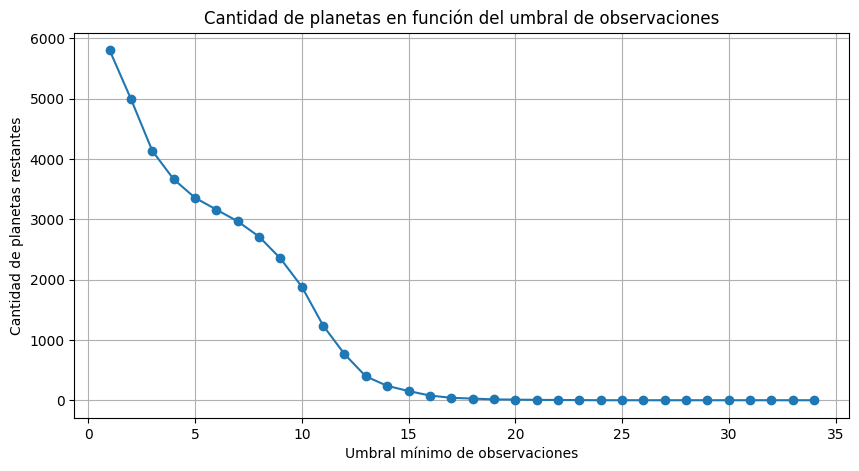

In [9]:
import matplotlib.pyplot as plt
# Graficar la cantidad de planetas restantes según el umbral
plt.figure(figsize=(10, 5))
plt.plot(thresholds, remaining_planets, marker='o', linestyle='-')
plt.xlabel("Umbral mínimo de observaciones")
plt.ylabel("Cantidad de planetas restantes")
plt.title("Cantidad de planetas en función del umbral de observaciones")
plt.grid(True)
plt.show()

In [ ]:
# Sugerencia de umbral basado en la mediana
define_threshold = 7
filtered_planets = sum(observations_per_planet >= define_threshold)
print(f"Número de planetas con al menos {define_threshold} observaciones: {filtered_planets}")


Remove unwanted columns

In [5]:
print(nasa.columns)

# nasa = nasa.filter(like="pl_") # another idea of how it could be done...

relevant_columns = [
    # Planet identification
    'pl_name', 'hostname',

    # Planetary parameters
    'pl_orbper',  # Orbital period (days)
    'pl_orbsmax',  # Semi-major axis (AU)
    'pl_orbeccen',  # Orbital eccentricity
    'pl_rade',  # Planet radius (Earth radii)
    'pl_bmasse',  # Planet mass (Earth masses, best estimate)
    'pl_masse',  # Planet mass (Earth masses)
    'pl_dens',  # Planet density (g/cm³)
    'pl_insol',  # Insolation flux relative to Earth
    'pl_eqt',  # Planet equilibrium temperature (K)
    'pl_orbincl',  # Orbital inclination (degrees)

    # Host star parameters
    'st_teff',  # Star effective temperature (K)
    'st_rad',  # Star radius (Solar radii)
    'st_mass',  # Star mass (Solar masses)
    'st_lum',  # Star luminosity (Solar luminosities)
    'st_met',  # Star metallicity ([Fe/H])
    'st_logg',  # Star surface gravity (cm/s²)

    # Additional useful data
    'sy_dist',  # Distance from Earth (parsecs)
    'discoverymethod',  # Method of discovery
    'disc_year'  # Year of discovery
]


nasa = nasa[relevant_columns]
print(nasa.columns)

Index(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'default_flag', 'sy_snum',
       ...
       'rowupdate', 'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot',
       'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec'],
      dtype='object', length=288)
Index(['pl_name', 'hostname', 'pl_orbper', 'pl_orbsmax', 'pl_orbeccen',
       'pl_rade', 'pl_bmasse', 'pl_masse', 'pl_dens', 'pl_insol', 'pl_eqt',
       'pl_orbincl', 'st_teff', 'st_rad', 'st_mass', 'st_lum', 'st_met',
       'st_logg', 'sy_dist', 'discoverymethod', 'disc_year'],
      dtype='object')


In [6]:
# Here we can simply list how aggregating should be done for each column
def aggregate_observations(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.median()
    else:
        return col.iloc[0] # Takes the first value


nasa = nasa.groupby('pl_name').agg(aggregate_observations).reset_index()
display(nasa)

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_orbeccen,pl_rade,pl_bmasse,pl_masse,pl_dens,pl_insol,...,pl_orbincl,st_teff,st_rad,st_mass,st_lum,st_met,st_logg,sy_dist,discoverymethod,disc_year
0,11 Com b,11 Com,324.620000,1.210000,0.2345,NaN,5434.700000,NaN,NaN,NaN,...,NaN,4808.00,16.380,2.600,2.1105,-0.3050,2.380,93.1846,Radial Velocity,2007.0
1,11 UMi b,11 UMi,516.219985,1.530000,0.0800,NaN,3432.400000,NaN,NaN,NaN,...,NaN,4276.50,26.935,1.800,NaN,0.0100,1.765,125.3210,Radial Velocity,2009.0
2,14 And b,14 And,186.300000,0.775000,0.0000,NaN,1131.151300,NaN,NaN,NaN,...,NaN,4850.50,11.275,1.780,1.8015,-0.2250,2.590,75.4392,Radial Velocity,2008.0
3,14 Her b,14 Her,1766.410000,2.810000,0.3682,NaN,1523.958885,2559.47216,NaN,NaN,...,144.652,5297.47,1.000,0.910,-0.1515,0.4050,4.415,17.9323,Radial Velocity,2002.0
4,16 Cyg B b,16 Cyg B,799.475000,1.678000,0.6821,NaN,533.942200,NaN,NaN,NaN,...,NaN,5747.00,1.130,1.000,0.0970,0.0600,4.350,21.1397,Radial Velocity,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,ups And b,ups And,4.617111,0.059140,0.0200,NaN,218.531000,NaN,NaN,NaN,...,NaN,6131.14,1.630,1.290,0.5250,0.1115,4.165,13.4054,Radial Velocity,1996.0
5799,ups And c,ups And,241.240500,0.828387,0.2495,NaN,629.437500,4443.24113,NaN,NaN,...,NaN,6105.51,1.630,1.295,0.5250,0.1220,4.130,13.4054,Radial Velocity,1999.0
5800,ups And d,ups And,1279.803500,2.523500,0.2815,NaN,1307.867185,3257.74117,NaN,NaN,...,NaN,6105.51,1.630,1.295,0.5250,0.1220,4.130,13.4054,Radial Velocity,1999.0
5801,ups Leo b,ups Leo,385.200000,1.180000,0.3200,NaN,162.092490,NaN,NaN,NaN,...,NaN,4836.00,11.220,1.480,1.8000,-0.2000,2.460,52.5973,Radial Velocity,2021.0


## Export the processed data

In [9]:
nasa.to_csv('../data/nasa_aggregated.csv')